In [1]:
# Installation
# ! pip install librosa soundfile numpy sklearn pyaudio

In [136]:
import pandas as pd
import numpy as np
import re

import os, sys, glob, pickle

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import soundfile as sf

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import IPython.display as ipd

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


RAVEDESS DATA

In [3]:
#Checking the data 

file_path = "../SER/SER-Ravdess-data"

file_directory=os.listdir(file_path)
print('RAVEDESS DATA')
print(file_directory)


RAVEDESS DATA
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
emotion_list=[]
path_list =[]
Gender = []

for directory in file_directory:
    actor = os.listdir(file_path + '/' + directory)
    for file in actor:
        part = file.split('.')[0].split('-')[2]
        emotion_list.append(int(part))
        gender_id = file.split('.')[0].split('-')[6]
        gender_id = int(gender_id)
        if gender_id%2 == 0:
            Gender.append('female')
        else:
            Gender.append('male')
            
        
        path_list.append(file_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Ravdess_df = pd.DataFrame({'Emotions':emotion_list, 'Gender':Gender,'Path':path_list})
Ravdess_df.Emotions.replace({1:'calm', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df['Emotion'] =Ravdess_df['Gender'] + '_'+ Ravdess_df['Emotions']
Ravdess_df.drop(['Emotions','Gender'],axis=1,inplace=True)
Ravdess_df.sample(5)

    

,Path,Emotion
1008,../SER/SER-Ravdess-data/Actor_17/03-01-07-02-0...,male_disgust
1367,../SER/SER-Ravdess-data/Actor_23/03-01-07-01-0...,male_disgust
1163,../SER/SER-Ravdess-data/Actor_20/03-01-04-01-0...,female_sad
1164,../SER/SER-Ravdess-data/Actor_20/03-01-04-02-0...,female_sad
2,../SER/SER-Ravdess-data/Actor_01/03-01-01-01-0...,male_calm


In [5]:
Ravdess_df['Emotion'] .value_counts()

male_calm          144
female_calm        144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: Emotion, dtype: int64

SAVEE DATA

In [148]:
SAVEE_path = "../SER/SAVEE"
savee_directory=os.listdir(SAVEE_path)

In [149]:
SAVEE_emotion=[]
path_SAVEE =[]

for files in savee_directory:
    path_SAVEE.append(SAVEE_path +'/'+ files )
    
    splitted = files.split('_')[1].split('.')[0]
    splitted = re.findall(r'(\w+?)(\d+)',splitted)[0][0]
    if splitted == 'a':
        SAVEE_emotion.append('male_angry')
    elif splitted == 'd':
        SAVEE_emotion.append('male_disgust')
    elif splitted == 'f':
        SAVEE_emotion.append('male_fear')
    elif splitted == 'h':
        SAVEE_emotion.append('male_happy')
    elif splitted == 'n':
        SAVEE_emotion.append('male_calm')
    elif splitted == 'sa':
        SAVEE_emotion.append('male_sad')
    elif splitted == 'su':
        SAVEE_emotion.append('male_surprise')
    else:
        SAVEE_emotion.append('male_unknown')

SAVEE_df = pd.DataFrame({'Emotion':SAVEE_emotion, 'Path':path_SAVEE})
SAVEE_df.sample(5)


,Emotion,Path
34,male_fear,../SER/SAVEE/DC_f05.wav
383,male_disgust,../SER/SAVEE/KL_d09.wav
345,male_surprise,../SER/SAVEE/JK_su01.wav
388,male_disgust,../SER/SAVEE/KL_d14.wav
263,male_disgust,../SER/SAVEE/JK_d09.wav


In [150]:
SAVEE_df['Emotion'] .value_counts()

male_calm        120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: Emotion, dtype: int64

TESS DATA

In [9]:
TESS_path = "../SER/TESS Toronto emotional speech set data"

TESS_directory=os.listdir(TESS_path)
print('TESS DATA')
print(TESS_directory)

TESS DATA
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']


In [43]:
Tess_emotion=[]
path_Tess =[]
for directory in TESS_directory:
    speech = os.listdir(TESS_path + '/' + directory)
    for file in speech:
        part = file.split('_')[2].split('.')[0]
        if part == 'ps':
            Tess_emotion.append('female_surprise')
        elif part == 'neutral':
            Tess_emotion.append('female_calm')
        else: 
            Tess_emotion.append('female_'+part)
        path_Tess.append(TESS_path + '/' + directory + '/' + file)

# dataframe for emotion of files
Tess_df = pd.DataFrame({'Emotion':Tess_emotion, 'Path':path_Tess})
Tess_df.sample(5)

,Emotion,Path
1282,female_sad,../SER/TESS Toronto emotional speech set data/...
868,female_calm,../SER/TESS Toronto emotional speech set data/...
448,female_fear,../SER/TESS Toronto emotional speech set data/...
2292,female_calm,../SER/TESS Toronto emotional speech set data/...
1613,female_disgust,../SER/TESS Toronto emotional speech set data/...


In [44]:
Tess_df['Emotion'].value_counts()

female_angry       400
female_disgust     400
female_fear        400
female_happy       400
female_calm        400
female_surprise    400
female_sad         400
Name: Emotion, dtype: int64

CREMA_D DATA

In [12]:
CREMA_path = "../SER/CREMA"

CREMA_directory=os.listdir(CREMA_path)
# print('CREMA DATA')
# print(CREMA_directory)

In [13]:
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
len(female)          

43

In [14]:
CREMA_emotion=[]
path_CREMA =[]
CREMA_Gender = []
for file in CREMA_directory:
    path_CREMA.append(CREMA_path + '/' + file)
    part = file.split('_')[2]
    gender_id = file.split('_')[0]
    gender_id = int(gender_id)
    if gender_id in female:
        CREMA_Gender.append('female')
    else:
        CREMA_Gender.append('male')
    if part == 'ANG':
        CREMA_emotion.append('angry')
    elif part == 'DIS':
        CREMA_emotion.append('disgust')
    elif part == 'FEA':
        CREMA_emotion.append('fear')
    elif part == 'HAP':
        CREMA_emotion.append('happy')
    elif part == 'NEU':
        CREMA_emotion.append('calm')
    elif part == 'SAD':
        CREMA_emotion.append('sad')
    else:
        CREMA_emotion.append('unknown')
CREMA_df = pd.DataFrame({'Emotions':CREMA_emotion, 'Path':path_CREMA,'Gender':CREMA_Gender})
CREMA_df['Emotion'] =CREMA_df['Gender'] + '_'+ CREMA_df['Emotions']
CREMA_df.drop(['Emotions','Gender'],axis=1,inplace=True)
CREMA_df.sample(5)

,Path,Emotion
6443,../SER/CREMA/1079_TIE_HAP_XX.wav,female_happy
736,../SER/CREMA/1010_IEO_DIS_MD.wav,female_disgust
3053,../SER/CREMA/1038_ITS_NEU_XX.wav,male_calm
2431,../SER/CREMA/1030_TSI_FEA_XX.wav,female_fear
1134,../SER/CREMA/1014_WSI_SAD_XX.wav,male_sad


In [15]:
CREMA_df['Emotion'].value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_calm         575
female_calm       512
Name: Emotion, dtype: int64

In [151]:
combo_data = pd.concat([SAVEE_df, Tess_df, CREMA_df, Ravdess_df],axis=0)
combo_data.to_csv('combined_data.csv',index=False)
combo_data.sample(5)


,Emotion,Path
572,female_sad,../SER/CREMA/1007_WSI_SAD_XX.wav
891,female_calm,../SER/TESS Toronto emotional speech set data/...
438,female_disgust,../SER/CREMA/1006_ITH_DIS_XX.wav
480,female_disgust,../SER/CREMA/1006_TSI_DIS_XX.wav
1257,male_angry,../SER/CREMA/1016_IWL_ANG_XX.wav


In [46]:
combo_data.Emotion.value_counts()

female_angry       1096
female_disgust     1096
female_fear        1096
female_happy       1096
female_sad         1096
female_calm        1056
male_calm           839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: Emotion, dtype: int64

EDA

c:\Users\halle\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


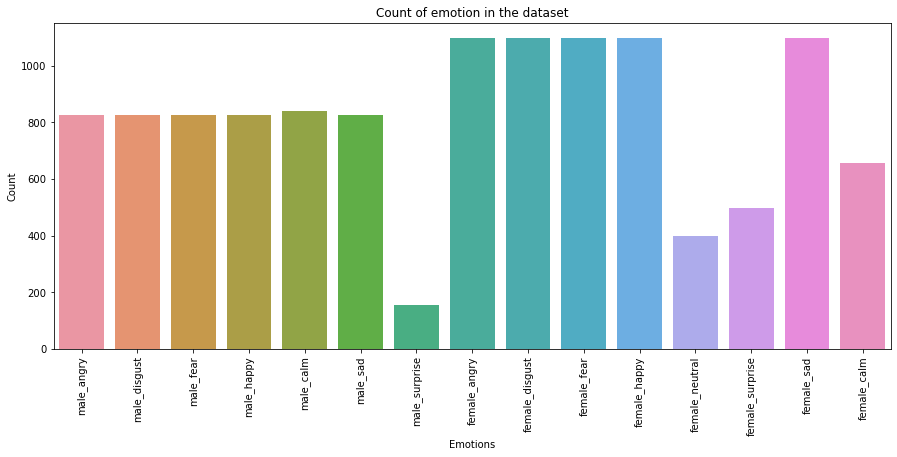

In [41]:
plt.figure(figsize=(15,6))
plt.title('Count of emotion in the dataset')
sns.countplot(combo_data.Emotion)
plt.ylabel('Count')
plt.xlabel('Emotions')
plt.xticks(rotation=90)
plt.show()

In [47]:
import random

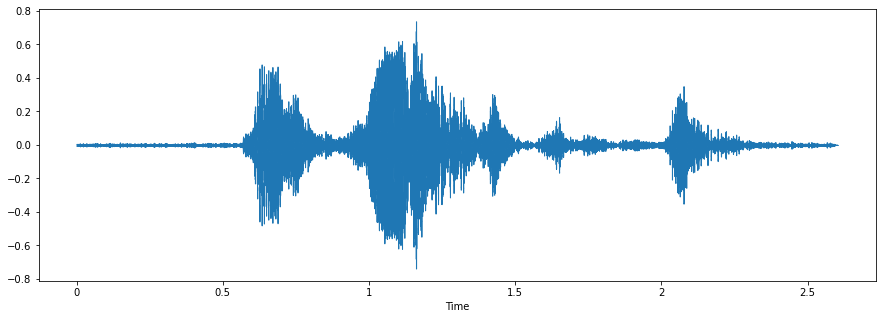

In [161]:
voice_rec = random.choice( combo_data['Path'] )
# voice_rec
data, sampling_rate = librosa.load(voice_rec)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(voice_rec)

MFCC 2 genders and emotions

-------------Female happy voice---------------


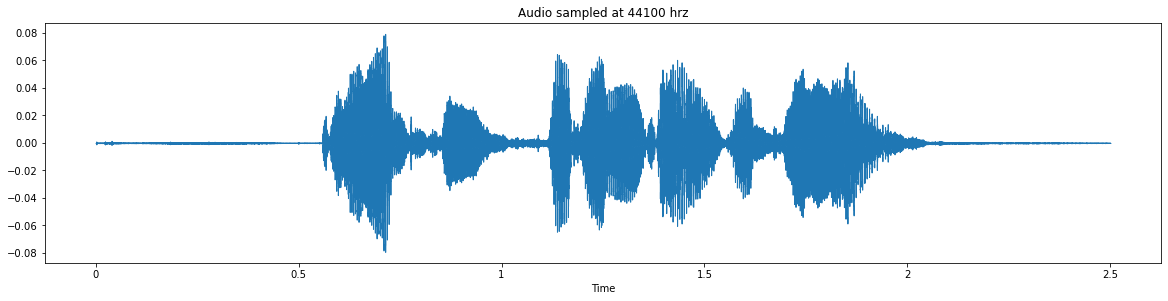

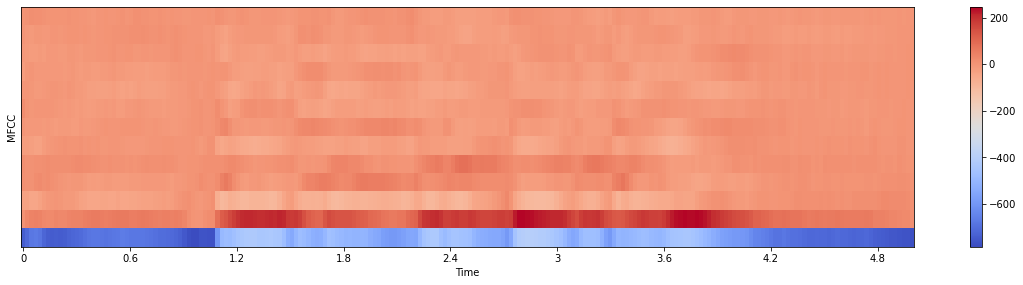

In [115]:
audio_path = "../SER/SER-Ravdess-data/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)


-------------Male happy voice---------------


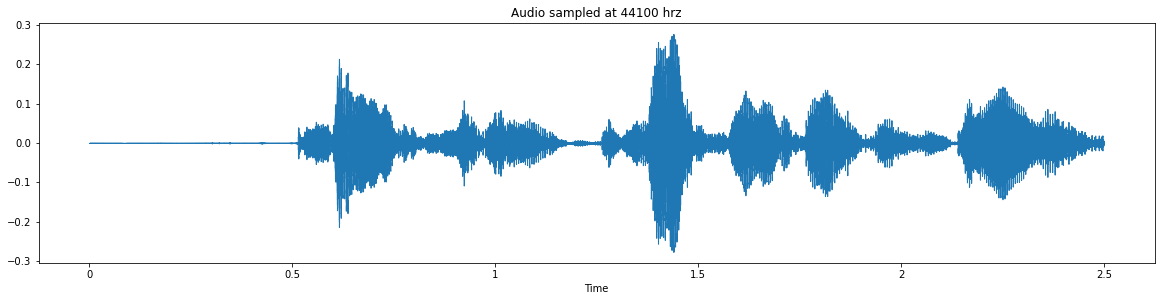

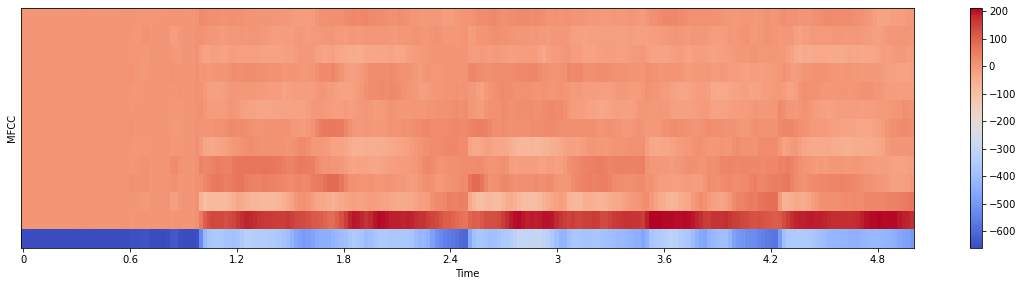

In [116]:
audio_path ="../SER/SER-Ravdess-data/Actor_11/03-01-03-02-01-01-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male happy voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Female angry voice---------------


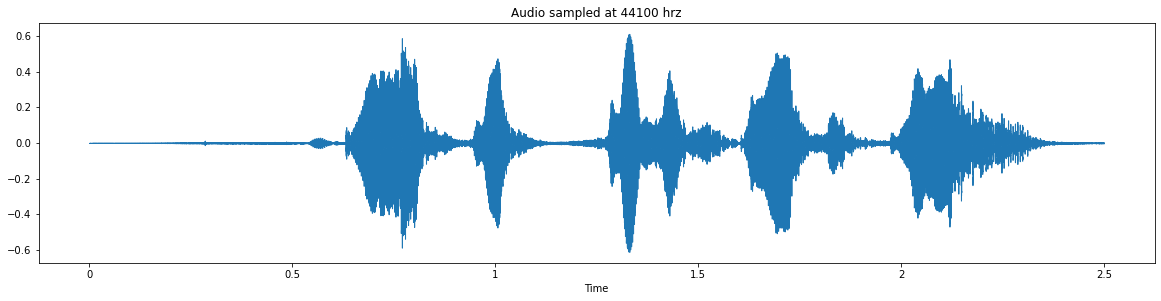

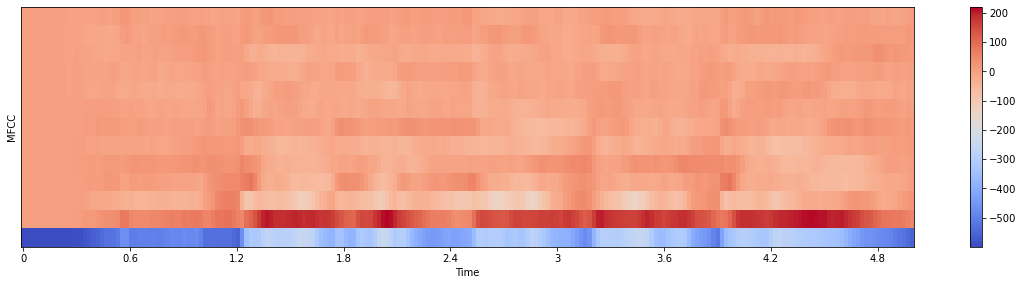

In [117]:
audio_path= "../SER/SER-Ravdess-data/Actor_12/03-01-05-02-02-02-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Female angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

-------------Male angry voice---------------


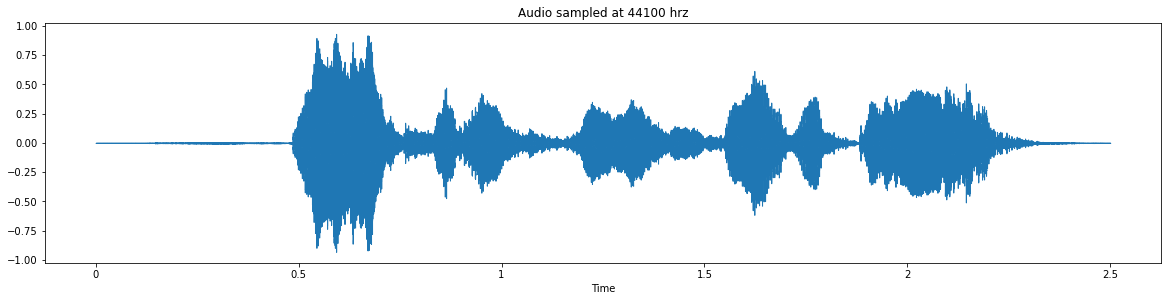

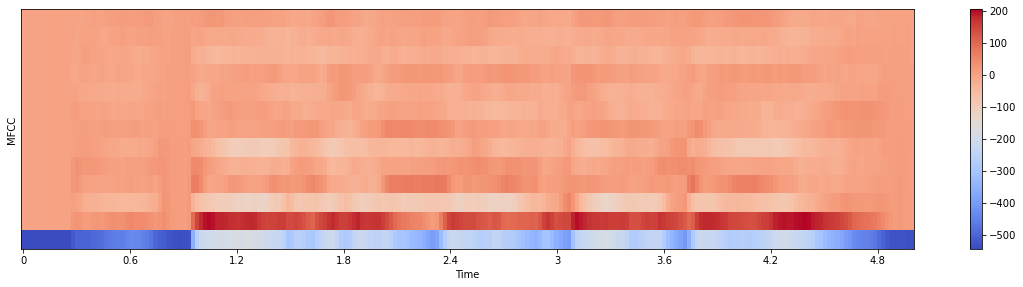

In [118]:
audio_path= "../SER/SER-Ravdess-data/Actor_11/03-01-05-02-02-02-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
print("-------------Male angry voice---------------")
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(audio_path)

Ploting the mean of each band and display it as a timeseries plot

216
216


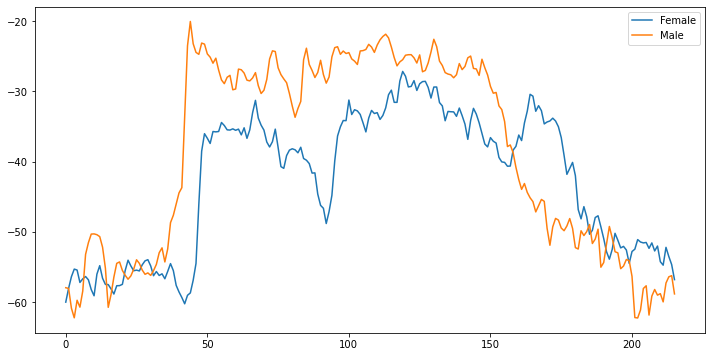

In [128]:
audio_path = "../SER/SER-Ravdess-data/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_female))

audio_path ="../SER/SER-Ravdess-data/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_male))

plt.figure(figsize=(12,6))
# plot()
plt.plot(mean_mfcc_female, label='Female')
plt.plot(mean_mfcc_male, label='Male')
plt.legend()
plt.show()


216
216


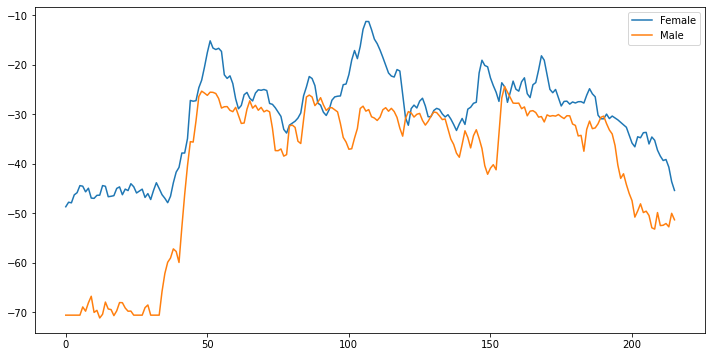

In [129]:
audio_path= "../SER/SER-Ravdess-data/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_female))


audio_path= "../SER/SER-Ravdess-data/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(audio_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc_male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
mean_mfcc_male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(mean_mfcc_male))

plt.figure(figsize=(12,6))
# plot()
plt.plot(mean_mfcc_female, label='Female')
plt.plot(mean_mfcc_male, label='Male')
plt.legend()
plt.show()

DATA AUGUMENTATION

In other to ehance the generability of the model, we will go ahead and add some perturbation on the training dataset.

We shall apply noise, strectch, change of pitch 

In [180]:
def noise(data):
    add_noise = 0.035*np.random.uniform()*np.amax(data)
    data = data + add_noise*np.random.normal(size = data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def pitch(data,sample_rate,pitch_factor = 0.7):
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

data_path = np.array(combo_data.Path)[10]
data, sample_rate = librosa.load(data_path)



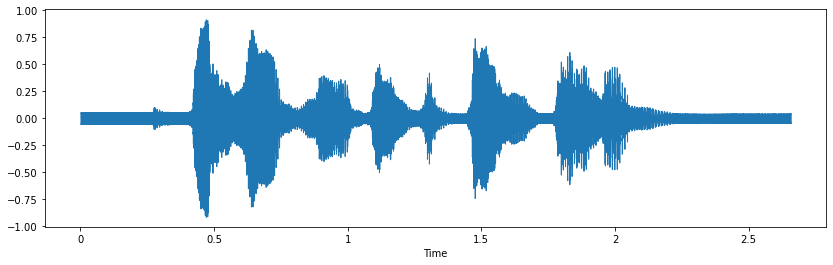

In [167]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr= sample_rate)
ipd.Audio(data_path)

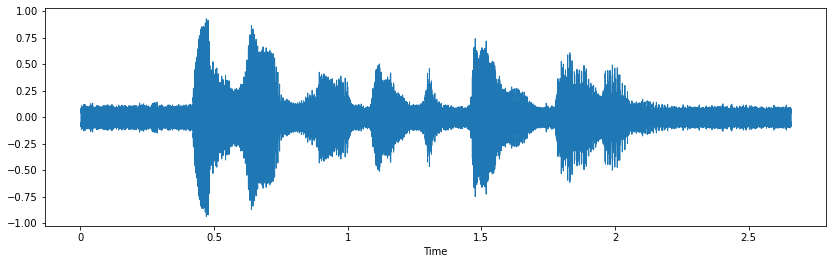

In [183]:
## NOISE

x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr= sample_rate)
ipd.Audio(x, rate=sample_rate )

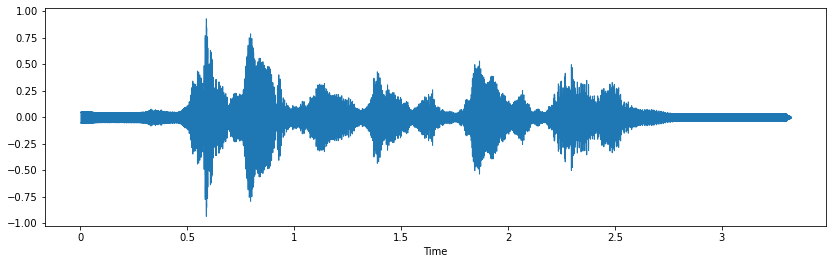

In [184]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr= sample_rate)
ipd.Audio(x, rate=sample_rate )

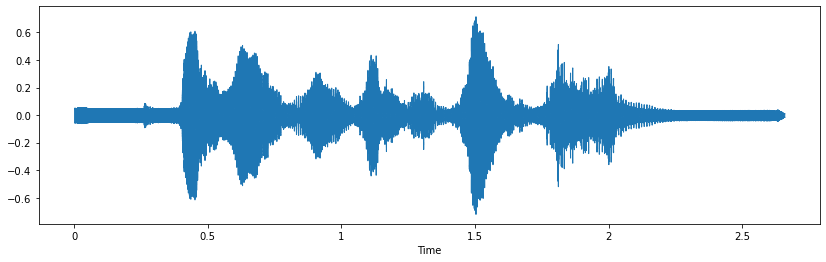

In [187]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [189]:
def feature_extration(data):
    # Zero Crossing Rate (ZCR)
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis = 0)
    result = np.hstack((result,zcr))
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [190]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = feature_extration(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = feature_extration(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feature_extration(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [192]:
X, Y = [], []
for path, emotion in zip(combo_data.Path, combo_data.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [193]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.038891,0.470774,0.580054,0.556175,0.485266,0.460437,0.484227,0.506239,0.460555,0.536101,...,0.000008,0.000002,0.000001,0.000001,1.059649e-06,8.348291e-07,4.372123e-07,1.530506e-07,5.519172e-08,male_angry
1,0.038891,0.471844,0.581388,0.557589,0.486870,0.462058,0.484785,0.506152,0.460801,0.536167,...,0.000014,0.000009,0.000007,0.000008,7.523579e-06,7.269368e-06,6.906663e-06,6.306139e-06,6.446289e-06,male_angry
2,0.036068,0.337897,0.434097,0.576744,0.553285,0.446121,0.431649,0.449895,0.458030,0.448255,...,0.000013,0.000005,0.000002,0.000001,8.838113e-07,7.072085e-07,4.771167e-07,3.160687e-07,2.672723e-07,male_angry
3,0.033904,0.662632,0.704404,0.622993,0.550236,0.483400,0.450052,0.422976,0.463144,0.555220,...,0.000095,0.000088,0.000079,0.000074,6.454493e-05,4.986126e-05,2.608372e-05,8.606809e-06,2.192711e-06,male_angry
4,0.035278,0.558654,0.687065,0.741958,0.663141,0.590448,0.514050,0.460884,0.441730,0.489820,...,0.000843,0.000767,0.000803,0.000812,7.722663e-04,7.905186e-04,7.610184e-04,7.363253e-04,7.104936e-04,male_angry


In [18]:
# sound, saamplerate = librosa.load(f'{file_path}/Actor_01/03-01-01-01-01-01-01.wav')

In [131]:
# print('Vibration sequence:', sound)
# array_len =sound.shape
# print('Sound shape:', array_len)
# print('Sample Rate (Hz):',saamplerate)

# print('Length of Audio:', array_len[0]/saamplerate)

In [130]:
# plt.figure(figsize=(16, 6))
# librosa.display.waveshow(y=sound, sr=saamplerate, color="#2f7d92ff")
# plt.title("Waveform of classical.00003.wav", fontsize=12)  
# plt.show()

In [21]:
# # Extracting feature; mfcc, chroma, mel

# #DataFlair - Extract features (mfcc, chroma, mel) from a sound file
# def extract_feature(file_name, mfcc, chroma, mel):
#     with sf.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#                     mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#                     result=np.hstack((result, mel))
#         return result

In [22]:
# # Defining emotions in the dataset

# emotions = {
#     '01':'neutral',
#     '02':'calm',
#     '03':'happy',
#     '04':'sad',
#     '05':'angry',
#     '06':'fearful',
#     '07':'disgust',
#     '08':'surprised'
# }

# observed_emotions =['calm','happy','fearful','disgust']

In [23]:
# #Loading the data and extraxting the features for each sound file
# def load_data(test_size=0.2):
#     x,y = [],[]
#     for file in glob.glob("../SER/SER-Ravdess-data/Actor_*/*.wav"):
#         file_name = os.path.basename(file)
#         emotion = emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#         # return train_test_split(np.array(x),y,test_size=test_size,random_state=9 )
#         return y